<a href="https://colab.research.google.com/github/yuriall/ML/blob/main/03-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])



In [3]:
from sklearn.model_selection import train_test_split

#훈련, 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state= 42)

# 훈련, 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# 최근접 이웃 개수를 3으로 하는 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

print(knr.predict([[50]]))

# 실제 농어의 무게는 예측한 1033g 보다 더 많이 나감 -> 오류 발생

[1033.33333333]


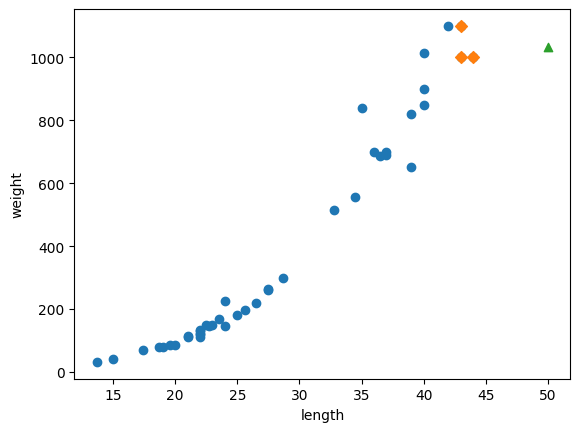

In [5]:
# 왜 그럴까? 산점도 그려보기
import matplotlib.pyplot as plt

# 50cm 의 농어 이웃 구함
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도 그러기
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50 농어만 다르게 표시하기
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
# 이웃 샘플들의 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


In [9]:
# k-최근접 이웃의 한계 : train 데이터의 범위를 넘어가면 엉뚱한 값을 예측할 수 있음
# 그래서 선형회귀 사용하기

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50 농어 예측하기
print(lr.predict([[50]]))


[1241.83860323]


In [10]:
#선형 회귀 기울기와 절편 출력
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


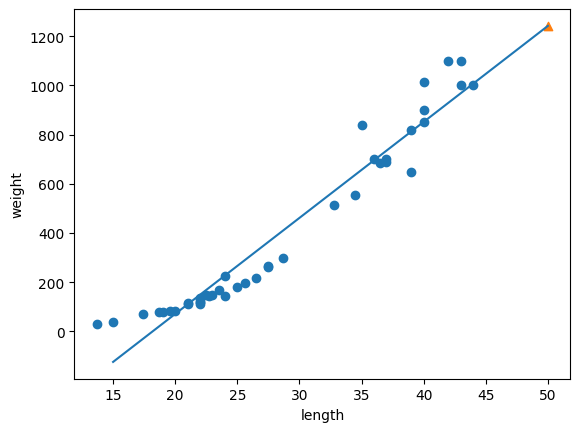

In [14]:
# 농어의 길이 15~50 까지 직선으로 산점도와 함께 그리기
#훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

#50cm의 농어 데이터만 따로 표시
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
# 훈련 세트 정확도
print(lr.score(train_input, train_target))
# 테스트 세트 정확도
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [18]:
# 선형회귀 식을 보면 곡선이 더 최적의 그래프일 것 같은 생각이 듬
# 2차 방정식의 식을 사용하려면 길이의 제곱의 데이터가 필요함
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [19]:
# 기울기 A,B 와 절편 C 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


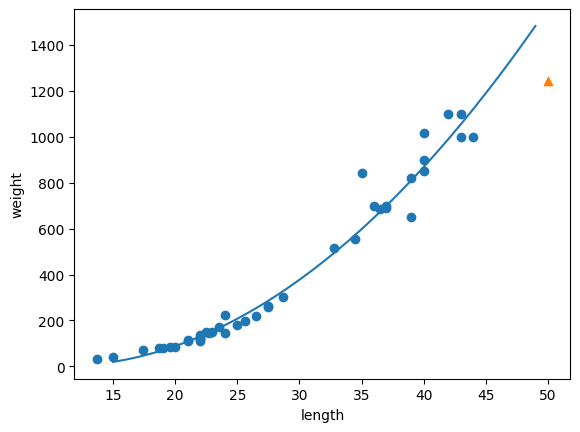

In [21]:
#산점도 그려보기 + 다항회귀 식 구해보기

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만듬 (간격1씩)
point = np.arange(15, 50)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm의 농어 데이터만 따로 표시
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
#훈련 set, 테스트 set score() 표시
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
